In [1]:
import pandas as pd
import geopandas as gpd
import contextily as cx

# Neighborhood Data

In [2]:
zipfile = r"\Users\zacha\Documents\UCLA\Data Science\Group Project\Exclusive-Neighborhoods.shp"
exclusive_gdf = gpd.read_file(zipfile)

In [3]:
exclusive_gdf.head()

,display_na,external_i,kind,latitude,location,longitude,name,name_1,set,slug,slug_1,sqmi,type,geometry
0,Bel-Air L.A. County Neighborhood (Current),bel-air,L.A. County Neighborhood (Current),-118.45841550000007,POINT(34.102056999123342 -118.45841550000007),34.102056999123342,Bel-Air,None,L.A. County Neighborhoods (Current),bel-air,None,6.37332143094,segment-of-a-city,"POLYGON ((-118.46902 34.12951, -118.46742 34.1..."
1,Beverly Crest L.A. County Neighborhood (Current),beverly-crest,L.A. County Neighborhood (Current),-118.42326299999999,POINT(34.106006999123245 -118.42326299999999),34.106006999123245,Beverly Crest,None,L.A. County Neighborhoods (Current),beverly-crest,None,8.23609299869,segment-of-a-city,"POLYGON ((-118.45321 34.13181, -118.45121 34.1..."
2,Brentwood L.A. County Neighborhood (Current),brentwood,L.A. County Neighborhood (Current),-118.49218850000007,POINT(34.086240999123547 -118.49218850000007),34.086240999123547,Brentwood,None,L.A. County Neighborhoods (Current),brentwood,None,15.2237014135,segment-of-a-city,"POLYGON ((-118.48842 34.13001, -118.47999 34.1..."
3,Hidden Hills L.A. County Neighborhood (Current),hidden-hills,L.A. County Neighborhood (Current),-118.65705600000015,POINT(34.16405683610931 -118.65705600000015),34.16405683610931,Hidden Hills,None,L.A. County Neighborhoods (Current),hidden-hills,None,1.70397314929,standalone-city,"POLYGON ((-118.66741 34.17675, -118.65859 34.1..."
4,Malibu L.A. County Neighborhood (Current),malibu,L.A. County Neighborhood (Current),-118.7542537868066,POINT(34.033895486545326 -118.7542537868066),34.033895486545326,Malibu,None,L.A. County Neighborhoods (Current),malibu,None,19.8863310758,standalone-city,"POLYGON ((-118.91770 34.06737, -118.87059 34.0..."


<AxesSubplot:>

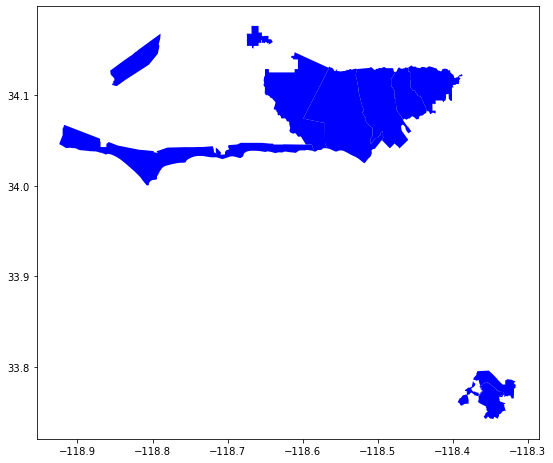

In [5]:
# plot the neighborhoods
exclusive_gdf.plot(color="blue", figsize=(9, 9))

In [6]:
exclusive_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   display_na  10 non-null     object  
 1   external_i  10 non-null     object  
 2   kind        10 non-null     object  
 3   latitude    10 non-null     object  
 4   location    10 non-null     object  
 5   longitude   10 non-null     object  
 6   name        10 non-null     object  
 7   name_1      0 non-null      object  
 8   set         10 non-null     object  
 9   slug        10 non-null     object  
 10  slug_1      0 non-null      object  
 11  sqmi        10 non-null     object  
 12  type        10 non-null     object  
 13  geometry    10 non-null     geometry
dtypes: geometry(1), object(13)
memory usage: 1.2+ KB


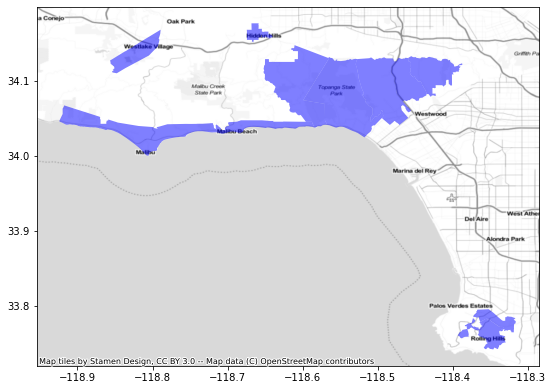

In [7]:
# plot the top neighborhoods
ax = exclusive_gdf.plot(color="blue",alpha=.5, figsize=(9, 9))
cx.add_basemap(ax, crs=exclusive_gdf.crs.to_string(), source=cx.providers.Stamen.TonerLite)

# Airbnb Data

In [8]:
# bring in the CSV and take a look at it
df = pd.read_csv('data/airbnb-listings.csv')
df.head(10)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,109,https://www.airbnb.com/rooms/109,20210207181900,2021-02-09,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...",NaN,https://a0.muscache.com/pictures/4321499/1da98...,521,https://www.airbnb.com/users/show/521,...,8.0,10.0,8.0,NaN,f,1,1,0,0,0.02
1,2708,https://www.airbnb.com/rooms/2708,20210207181900,2021-02-09,Runyon Canyon | Beau Furn Mir Mini-Suite Fire...,Run Runyon Canyon<br /><br />Beautifully Furni...,"Walk and run to Runyon Canyon, it is open!<br ...",https://a0.muscache.com/pictures/miso/Hosting-...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,10.0,NaN,t,2,0,2,0,0.34
2,2732,https://www.airbnb.com/rooms/2732,20210207181900,2021-02-09,Zen Life at the Beach,An oasis of tranquility awaits you.<br /><br /...,"This is the best part of Santa Monica. Quiet, ...",https://a0.muscache.com/pictures/1082974/0f74c...,3041,https://www.airbnb.com/users/show/3041,...,9.0,10.0,9.0,228269,f,2,1,1,0,0.18
3,2864,https://www.airbnb.com/rooms/2864,20210207181900,2021-02-09,* Beautiful Master Suite/Jacuzzi Tub/*,Centrally located.... Furnished with King Size...,What makes the neighborhood unique is that the...,https://a0.muscache.com/pictures/23817858/de20...,3207,https://www.airbnb.com/users/show/3207,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,5728,https://www.airbnb.com/rooms/5728,20210207181900,2021-02-10,Tiny Home in Artistic Oasis near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/7a29d275-f293...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,NaN,f,4,1,3,0,2.20
5,5729,https://www.airbnb.com/rooms/5729,20210207181900,2021-02-09,Zen Room with Floating Bed near Venice and LAX,Our home is located near Venice Beach without ...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/f48e3ea8-2075...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,NaN,f,4,1,3,0,1.65
6,5843,https://www.airbnb.com/rooms/5843,20210207181900,2021-02-09,Artist Oasis near Venice Beach w/ Beautiful Ga...,Do you want a taste of Paradise?<br />Our one-...,Our neighborhood is very quiet and save. There...,https://a0.muscache.com/pictures/25d657aa-2529...,9171,https://www.airbnb.com/users/show/9171,...,10.0,10.0,9.0,HSR19-002149,f,4,1,3,0,1.08
7,6931,https://www.airbnb.com/rooms/6931,20210207181900,2021-02-09,Run Runyon | Beau Furn Rm Dres Rm/Wlk-In Clst...,"Run & Walk, Runyon Canyon is now open! <br />...",We are in the middle of one of the great citie...,https://a0.muscache.com/pictures/37075299/eb4b...,3008,https://www.airbnb.com/users/show/3008,...,10.0,10.0,9.0,NaN,t,2,0,2,0,0.17
8,7874,https://www.airbnb.com/rooms/7874,20210207181900,2021-02-09,Sunny and Private 2nd story Queen Bedroom,Upstairs Large bedroom with great natural ligh...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,21700,https://www.airbnb.com/users/show/21700,...,10.0,10.0,10.0,NaN,f,3,0,3,0,0.47
9,7992,https://www.airbnb.com/rooms/7992,20210207181900,2021-02-10,"Quiet,Walkable Area/Sanitized/CozySpot",Furnished apartment with a walk score of 77 in...,Atwater Village has a variety of great shops a...,https://a0.muscache.com/pictures/miso/Hosting-...,22363,https://www.airbnb.com/users/show/22363,...,10.0,10.0,10.0,HSR19-003514,f,2,2,0,0,2.13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31900 entries, 0 to 31899
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31900 non-null  int64  
 1   listing_url                                   31900 non-null  object 
 2   scrape_id                                     31900 non-null  int64  
 3   last_scraped                                  31900 non-null  object 
 4   name                                          31899 non-null  object 
 5   description                                   30751 non-null  object 
 6   neighborhood_overview                         20185 non-null  object 
 7   picture_url                                   31900 non-null  object 
 8   host_id                                       31900 non-null  int64  
 9   host_url                                      31900 non-null 

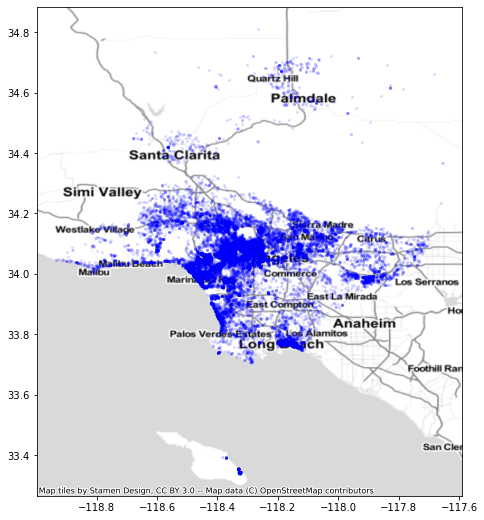

In [10]:
list_gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
list_gdf.crs = "epsg:3857"
ax = list_gdf.plot(color="blue", alpha=.10, figsize=(9, 9), markersize=4)
cx.add_basemap(ax, crs=exclusive_gdf.crs.to_string(), source=cx.providers.Stamen.TonerLite)

In [11]:
# only use the listings in the exclusive areas
from geopandas.tools import sjoin

exclusive_gdf.crs = "epsg:3857"

join_list_exclusive = sjoin(list_gdf, exclusive_gdf, how="inner")
join_list_exclusive.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1159 entries, 45 to 30487
Data columns (total 89 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            1159 non-null   int64   
 1   listing_url                                   1159 non-null   object  
 2   scrape_id                                     1159 non-null   int64   
 3   last_scraped                                  1159 non-null   object  
 4   name_left                                     1159 non-null   object  
 5   description                                   1116 non-null   object  
 6   neighborhood_overview                         781 non-null    object  
 7   picture_url                                   1159 non-null   object  
 8   host_id                                       1159 non-null   int64   
 9   host_url                                  

In [12]:
print(join_list_exclusive.crs)

epsg:3857


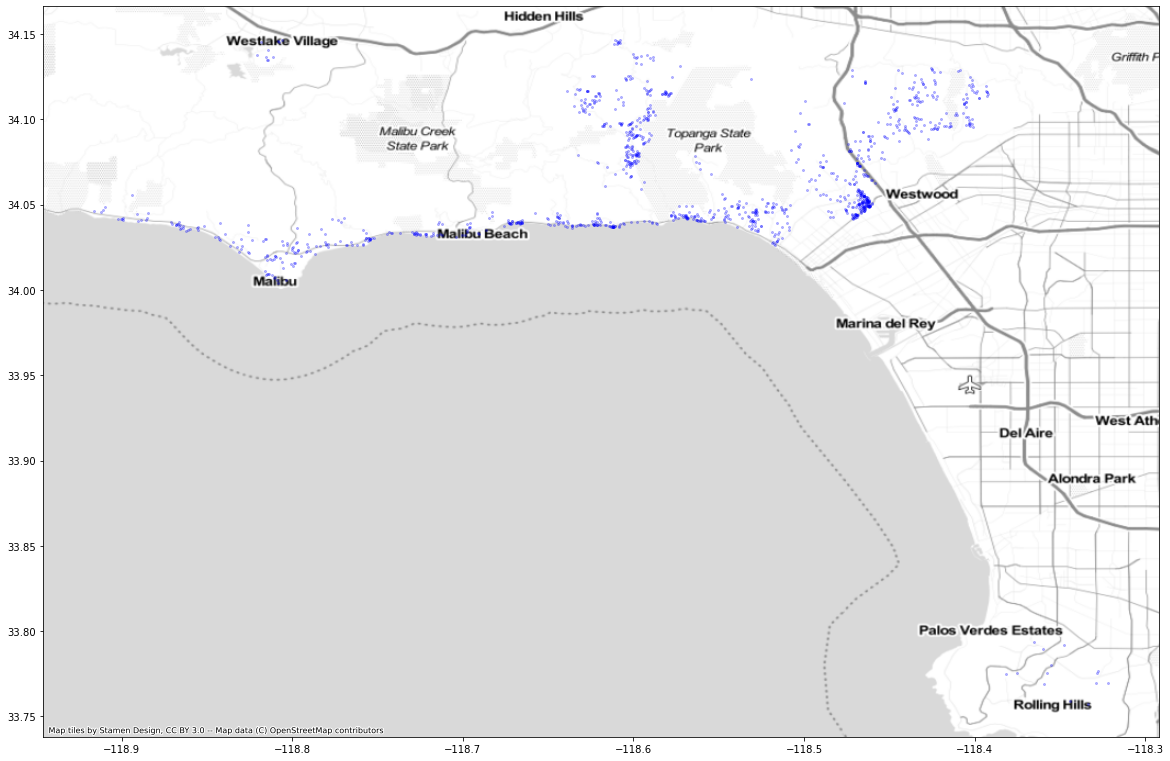

In [13]:
# map out the points
ax = join_list_exclusive.plot(color="blue", alpha=.25,figsize=(20, 20), markersize=4)
cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.Stamen.TonerLite)


In [19]:
join_list_exclusive.to_csv ('data/join_list_exclusive.csv', index = False, header=True)